In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


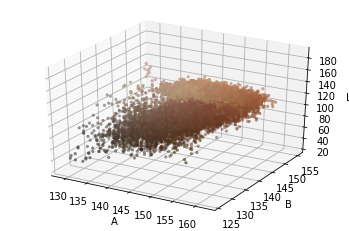

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image_BGR = np.uint8(np.random.rand(50,50,3) * 255)
#this image above is just an example. To load a real image use the line below
image_BGR = cv2.imread('/content/drive/MyDrive/Melanoma/17.jpg')

def toLAB(image, input_type = 'BGR'):
  conversion = cv2.COLOR_BGR2LAB if input_type == 'BGR' else cv2.COLOR_RGB2LAB
  image_LAB = cv2.cvtColor(image, conversion)

  y,x,z = image_LAB.shape
  LAB_flat = np.reshape(image_LAB, [y*x,z])

  colors = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if input_type == 'BGR' else image
  colors = np.reshape(colors, [y*x,z])/255.

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs=LAB_flat[:,2], ys=LAB_flat[:,1], zs=LAB_flat[:,0], s=10,  c=colors, lw=0)
  ax.set_xlabel('A')
  ax.set_ylabel('B')
  ax.set_zlabel('L')

  plt.show()

  return image_LAB 

lab_image = toLAB(image_BGR)